# Wits Health Analytics: Lab 5
### Drug database exploration



# __Introduction__

## __Problem Statement__
#### The objective of this analysis is to gain a deeper insight into the dataset, exploring the described drug attributes. Specifically, we are looking at things like how strong a medicine is, if a doctor needs to prescribe it, how safe it is during pregnancy, how the law sees its use, if it interacts with alcohol, and what people think about it. We also want to see how medicines that could be easily misused might affect public health. Our goal is to give doctors, people who make rules, and others important information about medicines and how they can affect patients.
##### The dataset can be found at:https://www.kaggle.com/datasets/jithinanievarghese/drugs-related-to-common-treatments/

## __Data Dictionary__
#### The dataset has several key attributes that aid in understanding the properties of drugs and their relationships with medical conditions. Here is a brief data dictionary outlining the crucial features:

__drug_name:__ The name of the drug.
__medical_condition:__ The associated medical condition for the drug.
__activity_percentage:__ Activity level of the drug.
__rx_otc:__ Prescription status of the drug (Rx = Prescription Needed, OTC = Over-the-counter).
__pregnancy_category:__ Pregnancy categorization for the drug.
__csa:__ Controlled Substances Act (CSA) schedule for the drug.
__alcohol:__ Interaction of the drug with alcohol.
__rating:__ User rating for the drug (1 = least effective, 10 = most effective).
__no_of_reviews:__ Number of reviews contributing to the rating.
__drug_link:__ Link to additional drug information.
__medical_condition_description:__ Description of the medical condition associated with the drug.
__medical_condition_url:__ URL for further details about the medical condition.

Based on the dataset from Kaggle: [Drugs Related to Medical Conditions](https://www.kaggle.com/datasets/jithinanievarghese/drugs-related-to-common-treatments/)

In [43]:
import pandas as pd

## Questions
Instructions: 
Answer each question in code and text cells below it (mark count indicated in brackets)

### 1. Basic Preprocessing 

1.1) Merge the two datasets (2)

In [44]:
df_conditions = pd.read_csv('C:/Users/STAFF/Desktop/Git_Repos/Health_Analytics/EDA/conditions.csv')
df_drugs_per_condition = pd.read_csv('C:/Users/STAFF/Desktop/Git_Repos/Health_Analytics/EDA/drugs_per_condition.csv')
print(f"CONDITIONS SHAPE: {df_conditions.shape}")
print(f"DRUGS PER CONDITION SHAPE: {df_drugs_per_condition.shape}")

CONDITIONS SHAPE: (3959, 3)
DRUGS PER CONDITION SHAPE: (3959, 10)


In [45]:
df = df_drugs_per_condition.merge(df_conditions, on= ['medical_condition'])
print(f"MERGED DATAFRAME SHAPE: {df.shape}")

MERGED DATAFRAME SHAPE: (647427, 12)


In [46]:
conditions_unique_values = set(df_conditions['medical_condition'].unique())
drugs_per_condition_unique_values = set(df_drugs_per_condition['medical_condition'].unique())

# Check if the unique values are the same in both datasets
if conditions_unique_values == drugs_per_condition_unique_values:
    print("The common column 'medical_condition' has exactly the same values in both datasets.")
else:
    print("The common column 'medical_condition' does not have the same values in both datasets.")

The common column 'medical_condition' has exactly the same values in both datasets.


In [47]:
df

,drug_name,medical_condition,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,drug_link,medical_condition_description,medical_condition_url
0,doxycycline,Acne,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/doxycycline.html,Acne Other names: Acne Vulgaris; Blackheads; B...,https://www.drugs.com/condition/acne.html
1,doxycycline,Acne,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/doxycycline.html,Acne Other names: Acne Vulgaris; Blackheads; B...,https://www.drugs.com/condition/acne.html
2,doxycycline,Acne,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/doxycycline.html,Acne Other names: Acne Vulgaris; Blackheads; B...,https://www.drugs.com/condition/acne.html
3,doxycycline,Acne,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/doxycycline.html,Acne Other names: Acne Vulgaris; Blackheads; B...,https://www.drugs.com/condition/acne.html
4,doxycycline,Acne,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/doxycycline.html,Acne Other names: Acne Vulgaris; Blackheads; B...,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...
647422,tirzepatide,Weight Loss,0%,Rx,NaN,N,X,5.7,10.0,https://www.drugs.com/mtm/tirzepatide.html,Weight Loss (Obesity/Overweight) More than hal...,https://www.drugs.com/condition/obesity.html
647423,tirzepatide,Weight Loss,0%,Rx,NaN,N,X,5.7,10.0,https://www.drugs.com/mtm/tirzepatide.html,Weight Loss (Obesity/Overweight) More than hal...,https://www.drugs.com/condition/obesity.html
647424,tirzepatide,Weight Loss,0%,Rx,NaN,N,X,5.7,10.0,https://www.drugs.com/mtm/tirzepatide.html,Weight Loss (Obesity/Overweight) More than hal...,https://www.drugs.com/condition/obesity.html
647425,tirzepatide,Weight Loss,0%,Rx,NaN,N,X,5.7,10.0,https://www.drugs.com/mtm/tirzepatide.html,Weight Loss (Obesity/Overweight) More than hal...,https://www.drugs.com/condition/obesity.html


1.2) Activity column: change name to activity_percentage, remove % from column values, and retype as int (3)

In [48]:
df.rename(columns={'activity': 'activity_percentage'}, inplace=True)

df['activity_percentage']=df['activity_percentage'].str.replace("%", "")

df['activity_percentage'] = df['activity_percentage'].astype(int)
type(df['activity_percentage'])

pandas.core.series.Series

### 2. Basic Data Exploration

2.1) Plot (1) and characterise the distribution of activity_percentage (2)

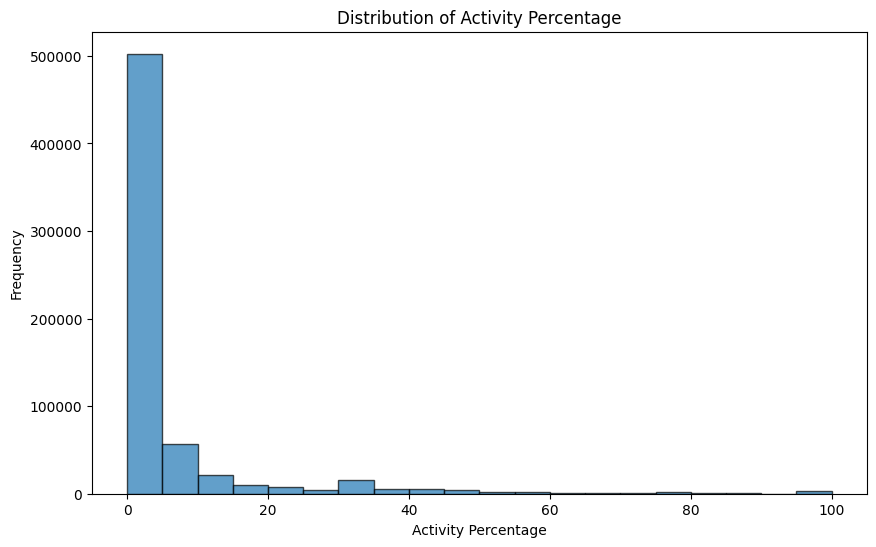

Mean: 5.712704289441126
Median: 1.0
Standard Deviation: 13.339124914002426


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['activity_percentage'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Activity Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Activity Percentage')
plt.grid(False)
plt.show()
 
print(f"Mean: {df['activity_percentage'].mean()}")
print(f"Median: {df['activity_percentage'].median()}")
print(f"Standard Deviation: {df['activity_percentage'].std()}")


2.2) How many drugs are available for each medical condition? (2)

In [67]:
df['medical_condition'].unique()
df['drug_name'].unique()


for i in df['medical_condition'].unique() :
    drugs_for_condition = df[df['medical_condition'] == i]['drug_name'].unique()
    print(f"Medical Condition : {i}\nNumber of the drugs available: {len(drugs_for_condition)} ")
    print(f"Namely: {', '.join(drugs_for_condition)}\n")
    



Medical Condition : Acne
Number of the drugs available: 237 
Namely: doxycycline, spironolactone, minocycline, Accutane, clindamycin, Aldactone, tretinoin, isotretinoin, Bactrim, Retin-A, Aczone, benzoyl peroxide, Differin, Epiduo, adapalene, cephalexin, Doryx, tetracycline, Septra, Solodyn, Tazorac, Vibramycin, Acticlate, benzoyl peroxide / clindamycin, Doxy 100, Keflex, sulfamethoxazole / trimethoprim, Benzaclin, Monodox, Targadox, Adoxa, Adoxa CK, Adoxa Pak, Adoxa TT, Avidoxy, Bactrim DS, Cleocin T, Clindagel, Doryx MPC, erythromycin, Morgidox, Oraxyl, Claravis, Clinda-Derm, Evoclin, Minocin, Yaz, adapalene / benzoyl peroxide, Clindacin ETZ, Clindacin P, Clindacin PAC, ClindaReach Pledget, Clindets, Milk of Magnesia, Septra DS, Yasmin, Ziana, Absorica, Acanya, Amnesteem, azelaic acid, Co-trimoxazole, dapsone, Duac, Emcin Clear, Epiduo Forte, Erygel, Ery Pads, Myorisan, Onexton, Phillips' Milk of Magnesia, salicylic acid, Spotex, Theramycin Z, Absorica LD, Achromycin V, Acne Treatmen

2.3) How many unique drugs are listed in the dataset? (2)

In [72]:
print(f"The number of unique drugs: {len(df['drug_name'].unique())}")

The number of unique drugs: 2912


### 3. Activity Analysis

3.1) Which drug has the highest activity based on site visitor activity? (2)

In [74]:
df['drug_name'][max(df['activity_percentage'].values)]

'doxycycline'

3.2) Provide a brief interpretation of what this might indicate. (2)

Given the primary usage of deoxycycline, this might indicate that most of the patients suffer from bacterial and parasitic sicknesses such as syphylis cholera and acne.


### 4 Prescription Analysis

4.1) How many drugs are available over-the-counter (OTC) vs. prescription (Rx)? (2)

In [82]:
df['rx_otc'].unique()

print(f"Drugs available over-the-counter: {sum(df['rx_otc']== 'OTC')}")
print(f"Prescription drugs: {sum(df['rx_otc']== 'Rx')}")


Drugs available over-the-counter: 79361
Prescription drugs: 383697


4.2) Which medical condition has the highest number of OTC drugs? (2)

In [86]:
otc_counts_per_condition = df[df['rx_otc'] == 'OTC'].groupby('medical_condition').size()

max_otc_count = otc_counts_per_condition.max()
condition_with_max_otc = otc_counts_per_condition[otc_counts_per_condition == max_otc_count].index[0]

print(f"{condition_with_max_otc} has the highest number of OTC drugs")
print(f"Number of OTC drugs for this condintion: {max_otc_count}")


Pain has the highest number of OTC drugs
Number of OTC drugs for this condintion: 25938


### 5. Pregnancy Category Analysis

5.1) List the number of drugs in each pregnancy category. (2)

In [94]:
number_in_pregnancy_category = df.groupby('pregnancy_category')['drug_name'].nunique()

print(f"Number of drugs in each pregnancy category:\n{number_in_pregnancy_category}")





Number of drugs in each pregnancy category:
pregnancy_category
A      18
B     504
C    1373
D     227
N     436
X     129
Name: drug_name, dtype: int64


5.2) Which medical condition has the highest number of drugs in category X? (2)

In [101]:
df_by_pregnancyX = df[df['pregnancy_category'] == 'X']

drug_for_each_condition = df_by_pregnancyX.groupby('medical_condition')['drug_name'].nunique()

condition_having_Highest = drug_for_each_condition.idxmax()
max_drug_count = drug_for_each_condition.max()

print(f"The medical condition with the highest number of drugs in category X is: {condition_having_Highest}")
print(f"Number of drugs for this condition is: {max_drug_count}")


The medical condition with the highest number of drugs in category X is: Acne
Number of drugs for this condition is: 36


5.3) What might be the implications for pregnant women with this condition? (3)


Pregnant women experiencing acne, much like everyone else, might face potential challenges related to their skin health during pregnancy. Acne in pregnancy could be influenced by hormonal changes, this may impact the overall well-being and self-esteem of these pregnant women.

### 6. Controlled Substances Act (CSA) Schedule Analysis

6.1) How many drugs fall under each CSA schedule? (2)

In [105]:
csa_schedules = df.groupby('csa')['drug_name'].nunique()

print(f"The number of drugs in each CSA schedule:\n{csa_schedules}")


The number of drugs in each CSA schedule:
csa
2     101
3      26
4      71
5      20
M      16
N    2669
U       9
Name: drug_name, dtype: int64


6.2) Identify drugs that have multiple schedules. (2)

In [118]:
drugs_with_multiple_schedules = df[df['csa'] == 'M']['drug_name'].unique()

print("Drugs with multiple schedules (denoted as Schedule 'M'):\n")
for i in drugs_with_multiple_schedules:
    print(i)



Drugs with multiple schedules (denoted as Schedule 'M'):

Virtussin DAC
Cheratussin DAC
codeine / guaifenesin / pseudoephedrine
Biotussin DAC
Ambifed CD
chlorpheniramine / codeine
Codar AR
Coditussin DAC
Guaifen DAC
Lortuss EX
Tricode GF
Tusnel C
Tuzistra XR
opium
pentobarbital
acetaminophen / codeine


6.3) Provide a brief interpretation of what this might indicate. (2)

These drugs have different schedules because they are made of more than one type of medicine. Each medicine does something different in our bodies. Some help with pain, some help with allergies, and others help with coughing. The schedules show us how to use these medicines in a safe way.

### 7.  Alcohol Interaction

7.1) How many drugs interact with alcohol? (2)

In [124]:
does_interact_with_alcohol = df[df['alcohol'] == 'X']['drug_name'].unique()

number_of_those_drugs = len(does_interact_with_alcohol)

print(f"Number of drugs that do interact with alcohol: {number_of_those_drugs}")


Number of drugs that do interact with alcohol: 1376


7.2)  Among the drugs that interact with alcohol, which medical condition has the most drugs? (2)

In [163]:
do_interact = df[df['alcohol'] == 'X']

number_of_drugs_per_condition = do_interact.groupby('medical_condition')['drug_name'].nunique()

condition_with_Highest = number_of_drugs_per_condition.idxmax()
highest_drug_number = number_of_drugs_per_condition.max()

print(f"The medical condition with the most drugs that interact with alcohol is: {condition_with_Highest}")
print(f"The number of drugs: {highest_drug_number}")


The medical condition with the most drugs that interact with alcohol is: Pain
The number of drugs: 252


7.3) Discuss the potential implications for patients with this condition who consume alcohol. (3)

When people have pain and they also drink alcohol while taking certain medicines, it can cause problems. Mixing alcohol with these medicines can make the effects stronger or cause unexpected reactions like feeling very tired, dizzy, or making bad decisions. The pain medicines may not work as well if alcohol is in the mix, making the pain stay or need stronger doses which can be risky. This mix of alcohol and medicines can be harmful for the liver, stomach, and heart, especially if someone drinks a lot over time. Some people with pain also take other medicines, and alcohol can make those medicines not work well or cause bad effects.

### 8. Rating Analysis

8.1) What is the average rating of drugs for each medical condition? (2)

In [129]:
ave_rating = df.groupby('medical_condition')['rating'].mean()

print(f"Average rating of drugs for each medical condition: \n{ave_rating}")


Average rating of drugs for each medical condition: 
medical_condition
ADHD                    7.062264
AIDS/HIV                7.047692
Acne                    7.565833
Allergies               5.233333
Alzheimer's             6.325000
Angina                  7.830000
Anxiety                 7.684615
Asthma                  7.230303
Bipolar Disorder        6.841071
Bronchitis              5.376190
COPD                    7.179310
Cancer                  5.500000
Cholesterol             5.866667
Colds & Flu             6.519048
Constipation            7.481081
Covid 19                4.656250
Depression              7.210989
Diabetes (Type 1)       6.644737
Diabetes (Type 2)       5.911719
Diarrhea                6.742857
Eczema                  8.294737
Erectile Dysfunction    7.530769
GERD (Heartburn)        7.218182
Gastrointestinal             NaN
Gout                    8.525000
Hair Loss               5.700000
Hayfever                6.635789
Herpes                  7.690000
Hyper

8.2) Identify the top 5 drugs with the highest ratings. (2)

In [150]:
sorted_df_by_rating = df.sort_values(by='rating', ascending=False)

unique_drug_names = sorted_df_by_rating['drug_name'].unique()

print("Top 5 unique drugs with the highest ratings:")
for i in range(5):
    drug_name = unique_drug_names[i]
    drug_rating = sorted_df_by_rating[sorted_df_by_rating['drug_name'] == drug_name]['rating'].values[0]
    print(f"Drug: {drug_name}, Rating: {drug_rating}\n")


Top 5 unique drugs with the highest ratings:
Drug: Anacin, Rating: 10.0

Drug: tolmetin, Rating: 10.0

Drug: Deconamine, Rating: 10.0

Drug: Legatrin PM, Rating: 10.0

Drug: chlorpheniramine / phenylephrine, Rating: 10.0



8.3) Provide a brief interpretation of their effectiveness based on user feedback. (3)


The drugs with a top rating of 10.0, as per user feedback, are seen as very effective. People who used these drugs found them to be highly helpful for managing their health issues, and they believe these drugs make a significant positive difference. The high rating suggests that users experienced relief and benefits while using these medications, with minimal negative effects or difficulties. However, it's important to remember that these ratings are based on personal experiences and can vary for each person

### 9. Advanced Analysis

9.1) Are there any correlations between a drug's rating and its activity based on site visitor activity? (6)

In [151]:
correlation = df['rating'].corr(df['activity_percentage'])

print(f"Correlation coefficient between rating and activity_percentage: {correlation}")


Correlation coefficient between rating and activity_percentage: -0.03460223774256347


The correlation coefficient between the drug's rating and its activity percentage based on site visitor activity is approximately -0.0346.

Given this correlation coefficient close to zero, it suggests a very weak negative correlation between the drug's rating and its activity percentage. In other words, there is a negligible relationship between how users rate a drug for its effectiveness and the level of activity or engagement related to that drug based on site visitor activity.

It's important to note that correlation does not imply causation, and this weak correlation indicates that user ratings for a drug are not significantly associated with the level of site visitor activity for that drug. Other factors might influence user ratings and activity independently.

9.2) What might this indicate about user preferences or drug effectiveness? (4)

The weak correlation suggests that users' opinions about a drug's effectiveness, as reflected in their ratings, are not significantly influenced by the level of activity or engagement related to that drug on the website. Users appear to base their ratings more on personal experiences and outcomes rather than the drug's popularity. Users have diverse preferences and considerations when evaluating a drug's effectiveness. Various factors like personal health outcomes, side effects, ease of use, and overall satisfaction with the drug shape their ratings, and these factors might not necessarily align with the drug's website activity. Moreover, users likely gather information about a drug's effectiveness from a multitude of sources, including healthcare professionals, personal experiences, online reviews, and recommendations from peers.

Simply put, the faint negative correlation implies that users form their opinions about a drug's effectiveness based on a wide range of factors, and the website's activity related to the drug does not significantly sway their ratings.

9.3) For drugs that require a prescription (Rx), how does their average rating compare to those that are available over-the-counter (OTC)? (3)

In [152]:
average_rating_for_Rx = df[df['rx_otc'] == 'Rx']['rating'].mean()

average_rating_for_OTC = df[df['rx_otc'] == 'OTC']['rating'].mean()

print(f"Average rating for drugs that require a prescription (Rx): {average_rating_for_Rx:.2f}")
print(f"Average rating for drugs that are available over-the-counter (OTC): {average_rating_for_OTC:.2f}")


Average rating for drugs that require a prescription (Rx): 6.75
Average rating for drugs that are available over-the-counter (OTC): 6.57


Drugs needing a prescription (Rx) tend to have a 1.027 times higher average rating of 6.75, while over-the-counter (OTC) drugs average a rating of 6.57.

This could be said to be indicative of the tendency among users to view prescription drugs as somewhat more effective or satisfactory compared to their over-the-counter counterparts, based on average ratings. However, because these are mean ratings, individual views on drug effectiveness are not necessariliy reflected here as they could depend on personal experiences, health situations, and various other elements.

### 10. Contextual Analysis

Analyze the potential public health implications of drugs that have a high potential for abuse (CSA schedules 1 and 2). Discuss strategies to mitigate the risks associated with these drugs. (10)

In [159]:
csa_1_2_drugs = df[df['csa'].isin(['1', '2'])]

print("Drugs classified under CSA schedules 1 and 2:")
csa_1_2_drugs.sample(6)


Drugs classified under CSA schedules 1 and 2:


,drug_name,medical_condition,activity_percentage,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,drug_link,medical_condition_description,medical_condition_url
378179,hydrocodone,Pain,46,Rx,C,2,X,5.5,188.0,https://www.drugs.com/hydrocodone.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390411,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
530090,Zyfrel,Pain,0,Rx,C,2,X,NaN,NaN,https://www.drugs.com/cdi/zyfrel.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
386132,hydromorphone,Pain,12,Rx,C,2,X,8.0,292.0,https://www.drugs.com/mtm/hydromorphone.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
380204,OxyContin,Pain,35,Rx,N,2,X,8.8,194.0,https://www.drugs.com/oxycontin.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
431198,Dazidox,Pain,2,Rx,N,2,X,NaN,NaN,https://www.drugs.com/cons/dazidox.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html




##### Drug abuse, especially involving substances categorized under Schedule 1 and 2 of the Controlled Substances Act (CSA), poses a grave threat to public health. These drugs, which include potent stimulants, hallucinogens, and cannabinoids, have a high potential for addiction, leading to a range of social, economic, and health consequences. Addiction to such substances can result in overdose, psychiatric disorders, infectious diseases, accidents, criminal activities, and a strain on healthcare systems. The impact is felt not only by the individuals directly affected but also by their families and communities, ultimately eroding the so-called "societal fabric" __(McColl and Sellers, 2006)__.

##### To mitigate the public health risks associated with drugs of high abuse potential, a multi-faceted approach is necessary. Public education campaigns play a pivotal role in raising awareness about the dangers of drug abuse and promoting responsible usage. Prevention programs, particularly targeting the youth, can educate individuals about the hazards of substance misuse, encouraging healthy lifestyle choices. Access control and prescription monitoring, including the implementation of prescription drug monitoring programs (PDMPs), are vital strategies to curb the misuse of such drugs, along with encouraging alternative pain management approaches to reduce over-reliance on opioids.

##### Equally important is the provision of accessible treatment and rehabilitation services for those struggling with addiction. Combining law enforcement efforts and legal measures with rehabilitation ensures a balanced approach to drug abuse. Leveraging technological solutions, such as telemedicine and AI-based monitoring, can enhance intervention strategies. Moreover, international cooperation and collaboration in combatting the global drug trade are essential components of a comprehensive approach to addressing the public health implications of drugs with high abuse potential. By implementing these strategies, societies can strive towards a healthier future, minimizing the devastating impact of drug abuse on individuals and communities.

## <u>References</u>
#### McColl, S. and Sellers, E.M., 2006. Research design strategies to evaluate the impact of formulations on abuse liability. Drug and Alcohol Dependence, 83, pp.S52-S62.

# 11. __Case Study__

Choose a specific drug from the dataset. Analyze its properties, including its activity, prescription status, pregnancy category, CSA schedule, alcohol interaction, and rating. Provide a comprehensive review of the drug, including potential use cases, risks, and benefits. (20)

In [162]:
chosen_drug = df[df['drug_name'].str.contains('morphine', case=False, na=False)]
chosen_drug

,drug_name,medical_condition,activity_percentage,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,drug_link,medical_condition_description,medical_condition_url
390025,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390026,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390027,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390028,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390029,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
...,...,...,...,...,...,...,...,...,...,...,...,...
390413,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390414,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390415,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html
390416,morphine,Pain,10,Rx,C,2,X,8.0,170.0,https://www.drugs.com/morphine.html,Pain An unpleasant sensory and emotional exper...,https://www.drugs.com/condition/pain.html


#### __The drug I have chosen is morphine__<br>
##### Morphine is a medication that is commonly used for the management of chronic pain. It is an opioid analgesic that acts on the central nervous system to relieve pain __(Deer *et al.*, 2019)__.

##### Due to its potential for abuse and addiction, it is classified under CSA schedule 2, necessitating a prescription for use. In terms of pregnancy, it falls under category C, meaning there's potential for benefits despite the risks to the fetus, but caution is advised during pregnancy. It's essential for pregnant individuals to consult their healthcare provider before using morphine. The interaction with alcohol, indicated by 'X', signifies that consuming morphine while consuming alcohol can have adverse effects or interactions, emphasizing caution when using both substances simultaneously. The high activity percentage (10) suggests that morphine is highly active in its intended use, providing potent pain relief. However, its rating of 8.0, based on user reviews, indicates that while effective, there may be some room for improvement or potential side effects, as indicated by the user feedback.

##### It is administered through various means such as intravenous infusion and intrathecal delivery,and acts swiftly to alleviate pain effectively. One significant use case for morphine is in managing acute and severe pain in hospital settings, especially following major surgeries or traumatic injuries. In cancer patients, particularly those in advanced stages, morphine significantly enhances their quality of life by alleviating the excruciating pain associated with the disease. For instance, a study analyzed 147,362 hospitalizations and found that 14.1% of patients received morphine for acute decompensated heart failure (ADHF). However, it was noted that morphine usage was associated with adverse events such as greater need for mechanical ventilation, prolonged hospitalization, increased ICU admissions, and higher mortality rates __(Peacock *et al.*, 2008)__.

##### Despite its efficacy, morphine carries potential risks and adverse effects. High doses or consumption alongside other respiratory-depressant substances like alcohol can cause respiratory depression. Tolerance and dependence are also known effects, necessitating careful monitoring, especially in vulnerable populations. Additionally, morphine abuse is a significant concern due to its opioid nature. Overuse or misuse can lead to addiction, impacting an individual's health and overall well-being. A study showed that morphine use was an independent predictor of mortality in ADHF patients, with an odds ratio of 4.84 (95% CI 4.52 to 5.18).

##### On the positive side, morphine offers substantial benefits, primarily in the realm of pain management, significantly improving the lives of those grappling with chronic pain. However, finding the right balance between the benefits of pain relief and careful management of associated risks is crucial for healthcare providers. It is essential for healthcare professionals to educate patients about the potential risks and closely monitor its usage to mitigate abuse. Morphine, when administered responsibly, emerges as a critical tool in enhancing the quality of life for individuals dealing with debilitating pain, highlighting its importance in modern healthcare.


### __References__
#### Deer, T.R., Pope, J.E., Hanes, M.C. and McDowell, G.C., 2019. Intrathecal therapy for chronic pain: a review of morphine and ziconotide as firstline options. Pain Medicine, 20(4), pp.784-798.

#### Peacock, W.F., Hollander, J.E., Diercks, D.B., Lopatin, M., Fonarow, G. and Emerman, C.L., 2008. Morphine and outcomes in acute decompensated heart failure: an ADHERE analysis. Emergency Medicine Journal, 25(4), pp.205-209.
#### Van Dongen, R.T.M., Crul, B.J.P. and De Bock, M., 1993. Long-term intrathecal infusion of morphine and morphine/bupivacaine mixtures in the treatment of cancer pain: a retrospective analysis of 51 cases. Pain, 55(1), pp.119-123.
